In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

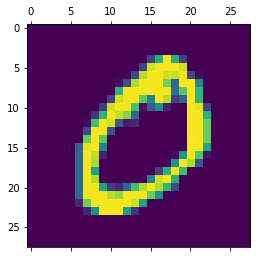

In [7]:
plt.matshow(X_train[1])

In [8]:
y_train[1]

0

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4693 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3036 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2728 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9260


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2668 - accuracy: 0.9260


[0.26677507162094116, 0.9259999990463257]

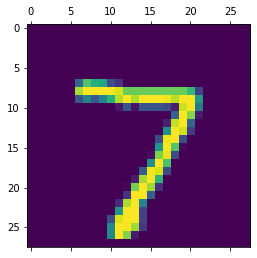

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted=model.predict(X_test_flattened)

In [17]:
y_predicted[0]

array([2.3706671e-02, 4.4436999e-07, 5.4200489e-02, 9.5611972e-01,
       1.5703959e-03, 9.2545219e-02, 1.2139723e-06, 9.9978036e-01,
       1.0170289e-01, 6.7443645e-01], dtype=float32)

In [18]:
y_test[0]

7

In [19]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
np.argmax(y_predicted[0])

7

In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   6,   10,  926,   16,    6,    4,   12,   10,   37,    5],
       [   4,    0,   21,  918,    0,   26,    2,   10,   19,   10],
       [   1,    2,    6,    2,  887,    0,   11,    4,    7,   62],
       [  10,    3,    3,   29,    6,  785,   14,    4,   31,    7],
       [  13,    3,    7,    1,    7,   13,  910,    2,    2,    0],
       [   1,    6,   21,    8,    4,    1,    0,  943,    2,   42],
       [   8,    9,    7,   19,    9,   26,    9,   11,  866,   10],
       [  11,    7,    1,    9,   12,    7,    0,   12,    5,  945]])>

Text(69.0, 0.5, 'Truth')

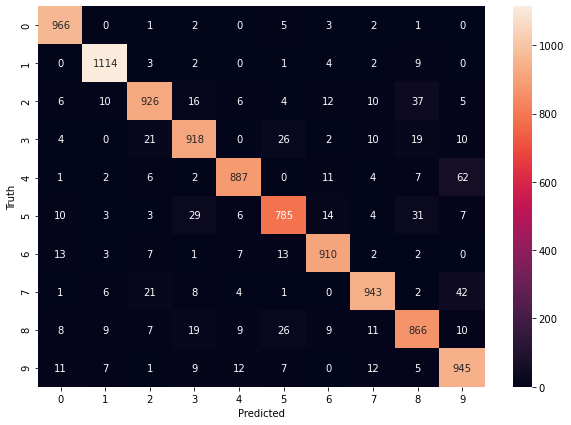

In [23]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2747 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1238 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0873 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0528 - accuracy: 0.9841


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0773 - accuracy: 0.9753


[0.07729226350784302, 0.9753000140190125]

Text(69.0, 0.5, 'Truth')

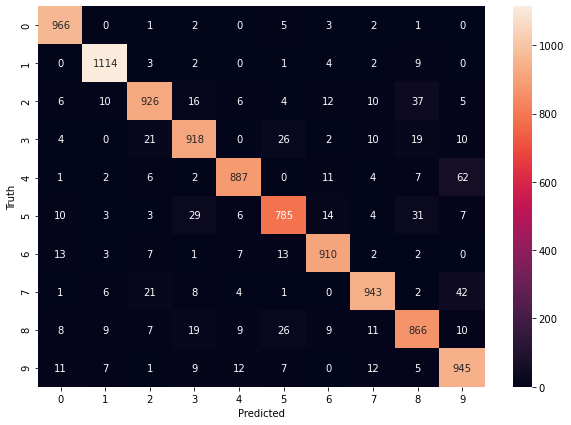

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2675 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1193 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0849 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0529 - accuracy: 0.9839
